In [ ]:
# from google.colab import files
# uploaded = files.upload()


Saving TSLA Historical Data 2015-2024.csv to TSLA Historical Data 2015-2024.csv


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [3]:
df = pd.read_csv("TSLA Historical Data 2015-2024.csv")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2486 entries, 0 to 2485
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2486 non-null   object 
 1   Price           2486 non-null   float64
 2   Open            2486 non-null   float64
 3   High            2486 non-null   float64
 4   Low             2486 non-null   float64
 5   Vol.(Millions)  2486 non-null   float64
 6   Change          2486 non-null   float64
dtypes: float64(6), object(1)
memory usage: 136.1+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)
df = df.sort_values('Date')
df.reset_index(drop=True, inplace=True)


In [6]:
df['Prev_Price'] = df['Price'].shift(1)
df = df.dropna()


In [7]:
features = [
    'Open',
    'High',
    'Low',
    'Vol.(Millions)',
    'Change',
    'Prev_Price'
]

target = 'Price'

X = df[features]
y = df[target]


In [8]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
split_index = int(0.8 * len(X_scaled))

X_train = X_scaled[:split_index]
X_test  = X_scaled[split_index:]

y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]


In [10]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(
    optimizer='adam',
    loss='mse'
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13304.3330 - val_loss: 63211.6094
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8639.7461 - val_loss: 21822.3184
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3504.5850 - val_loss: 6318.4580
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1615.1481 - val_loss: 1301.4387
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 243.5466 - val_loss: 181.6771
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.6012 - val_loss: 143.8689
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31.0104 - val_loss: 137.6701
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 32.8233 - val_loss: 132.7290
Epoch 9/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 30.9882 - val_loss: 131.7437
Epoch 10/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32.4123 - val_loss: 125.0865
Epoch 11/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.8654 - val_loss: 121.1611
Epo

In [12]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (MSE): 8.151444205898835
R-squared (R²): 0.9954255159445474


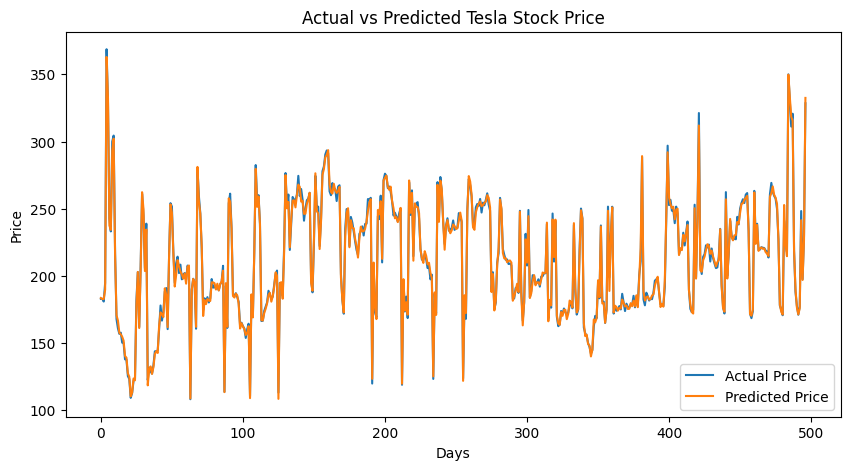

In [13]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title("Actual vs Predicted Tesla Stock Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()